# Convolutional Autoencoders
## Exercise 1

### Functions

In [25]:
# Import libraries
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
def get_data():
    # Load data
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x_full = np.concatenate((x_train, x_test), axis=0)
    y_full = np.concatenate((y_train, y_test), axis=0)

    # Split data
    x_train, x_temp, y_train, y_temp = train_test_split(x_full, y_full, test_size=0.2, random_state=42)
    x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
    print(f"Training set shape: {x_train.shape}, {y_train.shape}")
    print(f"Validation set shape: {x_val.shape}, {y_val.shape}")
    print(f"Test set shape: {x_test.shape}, {y_test.shape}")

    # Scale images to the [0, 1] range
    x_train = x_train.astype("float32") / 255
    x_val = x_val.astype("float32") / 255
    x_test = x_test.astype("float32") / 255

    # Convert class vectors to binary class matrices
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_val = tf.keras.utils.to_categorical(y_val, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    #Return data
    return (x_train, y_train), (x_val, y_val), (x_test, y_test)

In [5]:
def build_autoencoder(input_shape=(32, 32, 3)):
    # Build the autoencoder model
    autoencoder = tf.keras.models.Sequential([
        # Encoder
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
        tf.keras.layers.Conv2D(12, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
        
        # Latent Space
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),

        # Decoder
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2D(12, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
    ])

    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.summary()
    
    return autoencoder

In [18]:
def build_autoencoder_small_latent_space(input_shape=(32, 32, 3)):
    # Build the autoencoder model
    autoencoder = tf.keras.models.Sequential([
        # Encoder
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
        tf.keras.layers.Conv2D(12, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),

        # Latent Space now has 4 channels
        tf.keras.layers.Conv2D(4, (3, 3), activation='relu', padding='same'),

        # Decoder
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2D(12, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
    ])

    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.summary()
    
    return autoencoder 

In [46]:
def build_autoencoder_increased_filter_size(input_shape=(32, 32, 3), filter_size=7):
    # Build the autoencoder model
    autoencoder = tf.keras.models.Sequential([
        # Encoder
        tf.keras.layers.Conv2D(8, (filter_size, filter_size), activation='relu', padding='same', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
        tf.keras.layers.Conv2D(12, (filter_size, filter_size), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),

        tf.keras.layers.Conv2D(16, (filter_size, filter_size), activation='relu', padding='same'),

        # Decoder
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2D(12, (filter_size, filter_size), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2D(3, (filter_size, filter_size), activation='sigmoid', padding='same')
    ])

    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.summary()
    
    return autoencoder 

In [52]:
def build_autoencoder_strided_conv(input_shape=(32, 32, 3)):
    # Build the autoencoder model
    autoencoder = tf.keras.models.Sequential([
        # Encoder
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        
        # Instead of MaxPooling2D, use Strided Convolution
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', strides = 2, padding='same'),
        
        tf.keras.layers.Conv2D(12, (3, 3), activation='relu', padding='same'),
        
        # Instead of MaxPooling2D, use Strided Convolution
        tf.keras.layers.Conv2D(12, (3, 3), activation='relu', strides = 2, padding='same'),

        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),

        # Decoder
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2D(12, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
    ])

    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.summary()
    
    return autoencoder 

In [60]:
def build_autoencoder_fewer_layers(input_shape=(32, 32, 3)):
    # Build the autoencoder model
    autoencoder = tf.keras.models.Sequential([
        # Encoder
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        
        # Increased the pooling size to 4x4
        tf.keras.layers.MaxPooling2D((4, 4), padding='same'),
        
        # Removing layers
        # tf.keras.layers.Conv2D(12, (3, 3), activation='relu', padding='same'),
        # tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
        
        # Latent Space
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),

        # Decoder
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2D(12, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
    ])

    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.summary()
    
    return autoencoder

In [66]:
def compare_autoencoders(models_list, model_names, images, n=10):
    """
    Displays a grid comparing 'n' original images with the
    reconstructions from a list of autoencoder models.

    Args:
    models_list (list): A list of the trained Keras models.
    model_names (list): A list of strings for each model's title.
    images (np.array): The *normalized* test images (e.g., x_test_normalized).
    n (int): Number of image rows to display.
    """
    
    # Get predictions from all models first
    all_predictions = []
    for model in models_list:
        predictions = model.predict(images[:n])
        all_predictions.append(predictions)

    # Set up the matplotlib plot
    num_models = len(models_list)
    num_cols = 1 + num_models  # 1 for Original + 1 for each model
    
    # Create a grid with 'n' rows and 'num_cols' columns
    fig, axes = plt.subplots(n, num_cols, figsize=(num_cols * 1.0, n * 0.75))

    # Loop and display the images
    for i in range(n):
        
        # --- Column 0: Original Image ---
        ax_orig = axes[i, 0]
        ax_orig.imshow(images[i])
        ax_orig.axis('off')
        if i == 0:
            ax_orig.set_title("Original", fontsize=10)

        # --- Subsequent Columns: Model Reconstructions ---
        for j in range(num_models):
            ax_recon = axes[i, j + 1]
            
            # Get the correct prediction: from the j-th model, the i-th image
            recon_img = all_predictions[j][i]
            recon_img = np.clip(recon_img, 0, 1)
            
            ax_recon.imshow(recon_img)
            ax_recon.axis('off')
            if i == 0:
                ax_recon.set_title(model_names[j], fontsize=10)

    plt.tight_layout(pad=0.1)
    plt.show()

In [28]:
def train_autoencoder(autoencoder, x_train, x_val, epochs = 50, ):
    # Train the autoencoder
    train_history = autoencoder.fit(x_train, x_train,
                    epochs=epochs,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_val, x_val))
    
    return train_history


In [8]:
def evaluate_autoencoder(autoencoder, x_test):
    # Evaluate the autoencoder
    test_loss = autoencoder.evaluate(x_test, x_test)
    print(f'Test Loss: {test_loss}')

    return test_loss

In [9]:
def plot_training_history(train_history):
    # Plot training & validation loss values
    fig = px.line(x=train_history.epoch, 
                  y=[train_history.history['loss'], train_history.history['val_loss']],
                  labels={'x': 'Epoch', 'y': 'Loss'},
                  title='Model Loss')
    fig.update_layout(legend_title_text='Legend')
    fig.data[0].name = 'Train Loss'
    fig.data[1].name = 'Validation Loss'
    fig.show()

### Getting data

In [10]:
# Load and preprocess data
(x_train, y_train), (x_val, y_val), (x_test, y_test) = get_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 133s 1us/step
Training set shape: (48000, 32, 32, 3), (48000, 1)
Validation set shape: (6000, 32, 32, 3), (6000, 1)
Test set shape: (6000, 32, 32, 3), (6000, 1)


### Building Autoencoder

In [11]:
# Build the autoencoder
autoencoder = build_autoencoder()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 12)     │           876 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 12)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 16)       │         1,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 12)     │         1,740 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │           327 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,911 (19.18 KB)

 Trainable params: 4,911 (19.18 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Train the autoencoder
train_history = train_autoencoder(autoencoder, x_train, x_val, epochs=50)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 

In [30]:
# Evaluate the autoencoder
test_loss = evaluate_autoencoder(autoencoder, x_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0043
Test Loss: 0.004286685027182102


In [31]:
# Plot training history
plot_training_history(train_history)


Showing original vs. reconstructed images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


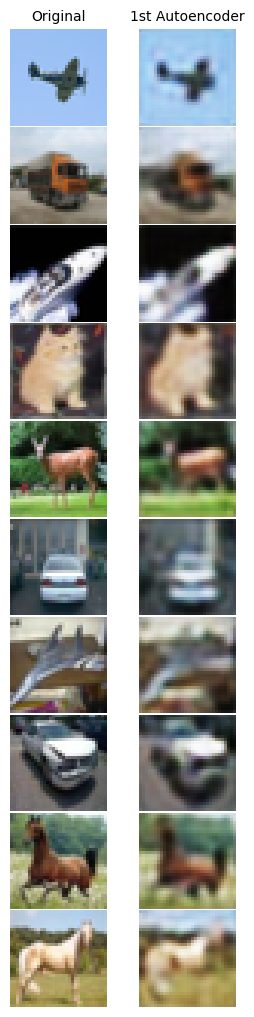

In [44]:
# Show the results
print("\nShowing original vs. reconstructed images:")
compare_autoencoders([autoencoder], ['1st Autoencoder'], images = x_test, n = 10)

## Exercise 2

### Latent space size

Equation:
$$
Size = \left( \frac{W - K + 2P}{S} + 1 \right)^2 * C
$$

Where:
- $W$: Input volume
- $K$: Kernel size (filter size)
- $P$: Padding
- $S$: Stride
- $C$: Number of channels

So:
- $W = 8 x 8 = 8$
- $K = 3 x 3 = 3$
- $P = 1 $
- $S = 1$
- $C = 16$

So:
- $Size = \left( \frac{8 - 3 + 2(1)}{1} + 1 \right)^2 * 16 = 64 * 16 = 1024$




### 2.1 Reducing latent space dimensionality

In [33]:
# Build the autoencoder with small latent space
autoencoder_small_ls = build_autoencoder_small_latent_space()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 12)     │           876 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 12)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 4)        │           436 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 16, 16, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 12)     │           444 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 32, 32, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 3)      │           327 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,307 (9.01 KB)

 Trainable params: 2,307 (9.01 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Train the autoencoder
train_history_small_ls = train_autoencoder(autoencoder_small_ls, x_train, x_val, epochs=50)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0281 - val_loss: 0.0166
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0149 - val_loss: 0.0134
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0112 - val_loss: 0.0099
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0090 - val_loss: 0.0089
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0087 - val_loss: 0.0086
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0084 - val_loss: 0.0084
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0082 - val_loss: 0.0082
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0078 - val_loss: 0.0078
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 

In [35]:
# Evaluate the autoencoder
test_loss = evaluate_autoencoder(autoencoder_small_ls, x_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0057
Test Loss: 0.005678947549313307


In [36]:
plot_training_history(train_history_small_ls)


Showing original vs. reconstructed images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


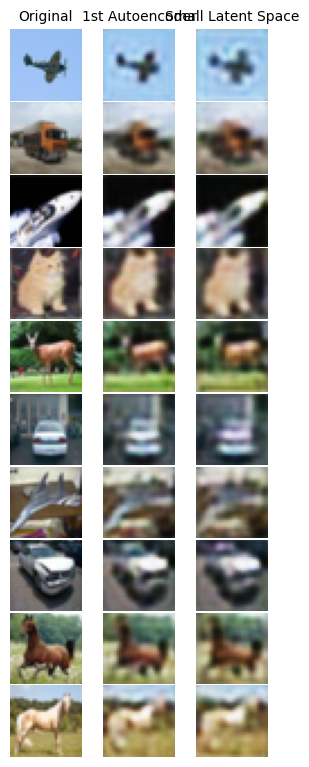

In [70]:
# Show the results
print("\nShowing original vs. reconstructed images:")
compare_autoencoders([autoencoder, autoencoder_small_ls], 
['1st Autoencoder', 'Small Latent Space'], images = x_test, n = 10)

### 2.2 Increased filter size

In [47]:
autoencoder_incresed_fs = build_autoencoder_increased_filter_size(filter_size=7)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 8)      │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 12)     │         4,716 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 12)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 16)       │         9,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_6 (UpSampling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 12)     │         9,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_7 (UpSampling2D)  │ (None, 32, 32, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 3)      │         1,767 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,511 (103.56 KB)

 Trainable params: 26,511 (103.56 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Train the autoencoder
train_history_increased_fs = train_autoencoder(autoencoder_incresed_fs, x_train, x_val, epochs=50)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 25s 128ms/step - loss: 0.0247 - val_loss: 0.0140
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - loss: 0.0132 - val_loss: 0.0113
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 123ms/step - loss: 0.0111 - val_loss: 0.0123
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - loss: 0.0098 - val_loss: 0.0114
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 122ms/step - loss: 0.0091 - val_loss: 0.0084
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 123ms/step - loss: 0.0086 - val_loss: 0.0081
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - loss: 0.0081 - val_loss: 0.0077
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 123ms/step - loss: 0.0079 - val_loss: 0.0076
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - loss: 0.0075 - val_loss: 0.0077
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 123ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 123ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 12/50
188/188

In [49]:
# Evaluate the autoencoder
test_loss = evaluate_autoencoder(autoencoder_incresed_fs, x_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0046
Test Loss: 0.004617184400558472


In [50]:
plot_training_history(train_history_small_ls)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


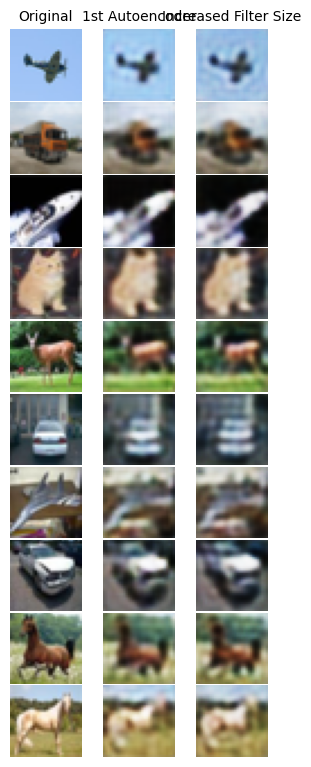

In [69]:
# Show the results
compare_autoencoders([autoencoder, autoencoder_incresed_fs], 
['1st Autoencoder', 'Increased Filter Size'], images = x_test, n = 10)

### 2.3 Changed the downsample method

In [53]:
autoencoder_strided_conv = build_autoencoder_strided_conv()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 12)     │           876 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 12)       │         1,308 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 8, 8, 16)       │         1,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_8 (UpSampling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 16, 16, 12)     │         1,740 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_9 (UpSampling2D)  │ (None, 32, 32, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 32, 32, 3)      │           327 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,803 (26.57 KB)

 Trainable params: 6,803 (26.57 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Train the autoencoder
train_history_strided_conv = train_autoencoder(autoencoder_strided_conv, x_train, x_val, epochs=50)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0240 - val_loss: 0.0112
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0092 - val_loss: 0.0081
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0065 - val_loss: 0.0062
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 

In [55]:
# Evaluate the autoencoder
test_loss = evaluate_autoencoder(autoencoder_incresed_fs, x_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0046
Test Loss: 0.004617184400558472


In [ ]:
plot_training_history(train_history_strided_conv)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


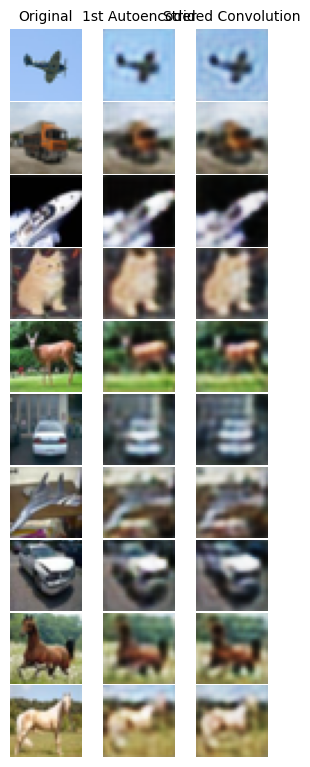

In [68]:
# Show the results
compare_autoencoders([autoencoder, autoencoder_incresed_fs], 
['1st Autoencoder', 'Strided Convolution'], images = x_test, n = 10)

### 2.4 Fewer layers

In [61]:
autoencoder_fewer_layers = build_autoencoder_fewer_layers()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 32, 32, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_10 (UpSampling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 16, 16, 12)     │         1,740 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_11 (UpSampling2D) │ (None, 32, 32, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 32, 32, 3)      │           327 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,459 (13.51 KB)

 Trainable params: 3,459 (13.51 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Train the autoencoder
train_history_fewer_layers = train_autoencoder(autoencoder_fewer_layers, x_train, x_val, epochs=50)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0255 - val_loss: 0.0133
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0117 - val_loss: 0.0108
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0080 - val_loss: 0.0079
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 

In [63]:
# Evaluate the autoencoder
test_loss = evaluate_autoencoder(autoencoder_fewer_layers, x_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0066
Test Loss: 0.006573445629328489


In [64]:
plot_training_history(train_history_fewer_layers)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


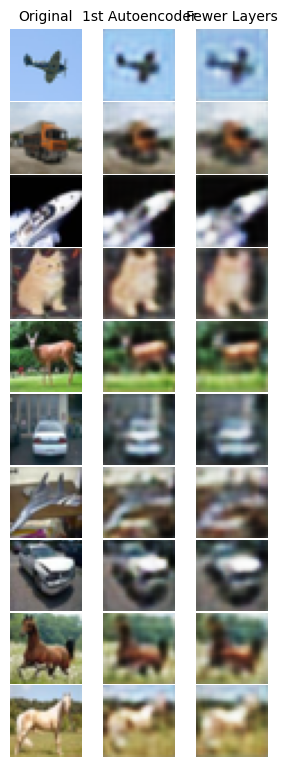

In [67]:
# Show the results
compare_autoencoders([autoencoder, autoencoder_fewer_layers], 
['1st Autoencoder', 'Fewer Layers'], images = x_test, n = 10)

## Exercise 3

In [ ]:
def rgb_to_gray(images):
    """Convert RGB [N,32,32,3] → Grayscale [N,32,32,1]."""
    return np.dot(images[...,:3], [0.299, 0.587, 0.114])[..., np.newaxis]

x_train_gray = rgb_to_gray(x_train)
x_val_gray   = rgb_to_gray(x_val)
x_test_gray  = rgb_to_gray(x_test)

Training data: (48000, 32, 32, 1) -> (48000, 32, 32, 3)


In [15]:
# Build the autoencoder
autoencoder_gray_color = build_autoencoder(input_shape=(32, 32, 1))

d:\OneDrive\Documentos\UM\um_code\ACML\assignments\autoencoders\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 12)     │           876 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 12)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 16)       │         1,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 12)     │         1,740 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 32, 32, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 3)      │           327 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,767 (18.62 KB)

 Trainable params: 4,767 (18.62 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the autoencoder
train_history = train_autoencoder(autoencoder_gray_color, x_train_gray, x_val_gray)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0194 - val_loss: 0.0096
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0082 - val_loss: 0.0073
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0068 - val_loss: 0.0064
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0050 - val_loss: 0.0051
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0049 - val_loss: 0.0049


In [14]:
# Evaluate the autoencoder
test_loss = evaluate_autoencoder(autoencoder, x_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0061
Test Loss: 0.0061337812803685665


In [17]:
# Plot training history
plot_training_history(train_history)